In [23]:
import numpy as np
import matplotlib.pyplot as plt
import TopHat as th
from PIL import Image
import Metrics as roc 
import ConcatenationTest as CT

In [24]:
# To Process
ruta = 'DB_Angiograms_134/Images/5.pgm'
img = Image.open(ruta).convert("L")
img_array = np.array(img)

# Ground Truth
gt_ruta = 'DB_Angiograms_134/Results/5_gt.pgm'
gtim = Image.open(gt_ruta).convert("L")
gt_array = np.array(gtim)

In [25]:
kernel1 = th.crea_kernel(17)
TopHat = th.BlackHat(img_array, kernel1)

In [26]:
folder_gt = 'DB_Angiograms_134/Results'
concatenated_gt = CT.concatenate_images_from_folder(folder_gt)

In [27]:
kernel = th.crea_kernel(17)
input_folder = 'DB_Angiograms_134/Images'
output_folder = 'DB_Angiograms_134/output'
CT.process_and_save_images(input_folder, output_folder, kernel)
concatenated_results = CT.concatenate_images_from_folder(output_folder)

Proceso completado.


In [28]:
import Binarizacion as ot
concatenated_bin = ot.otsu_threshold(concatenated_results)

El umbral fue 16.


(-0.5, 40199.5, 299.5, -0.5)

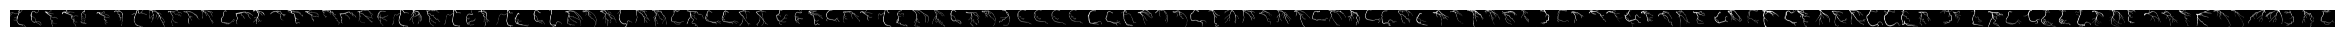

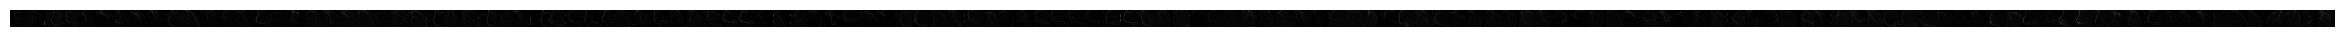

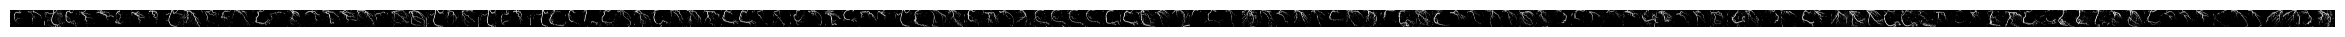

In [29]:
plt.figure(figsize=(30,7))
plt.imshow(concatenated_gt)
plt.axis('off')

plt.figure(figsize=(30,7))
plt.imshow(concatenated_results)
plt.axis('off')

plt.figure(figsize=(30,7))
plt.imshow(concatenated_bin)
plt.axis('off')

In [30]:
sensitivity = np.zeros(255)
specificity = np.zeros(255)
for i in range(0, 255):
    sen, spe = roc.tptn(i, concatenated_results, concatenated_gt)
    sensitivity[i] = sen
    specificity[i] = spe

In [31]:
output_bin = 'DB_Angiograms_134/Binarized'
output_folder = 'DB_Angiograms_134/output'
CT.process_and_save_images_binar(output_folder, output_bin)

Proceso completado.


In [32]:
output_bin = 'DB_Angiograms_134/Binarized'
conected_folder = 'DB_Angiograms_134/PostProcessed'
CT.process_and_save_images_conected(output_bin, conected_folder, min_size=50)

Proceso completado.


In [33]:
roc.curva_roc(sensitivity, specificity)

El área bajo la curva ROC (AUC) es: 0.5454451458008424
